## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights and observation
The dataset has msising values

In [8]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data Cleaning

In [9]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [10]:
# The provided code is used to count how many entries in the Reviews column of the DataFrame 
# df contain only numeric values.
# df['Reviews']:

# This selects the Reviews column from the DataFrame df.
# .str.isnumeric():

# This checks each value in the Reviews column to see if it contains only numeric characters (i.e., digits).
# It returns a boolean Series where:
# True indicates the value is numeric.
# False indicates the value is not numeric (e.g., it contains letters, symbols, or is missing).
# .sum():

# This sums up the True values in the boolean Series, where True is treated as 1 and False as 0.
# The result is the total count of rows in the Reviews column that contain only numeric values
# Purpose:
# This line of code is typically used during data cleaning or exploratory data analysis (EDA) 
# to determine how many rows in the Reviews column contain valid numeric data. This can help identify 
# and handle non-numeric or invalid entries in the column.
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [11]:
# The provided code is used to filter rows in the DataFrame df where the Reviews column contains non-numeric 
# values. 
# df['Reviews']:

# This selects the Reviews column from the DataFrame df.
# .str.isnumeric():

# This checks each value in the Reviews column to see if it contains only numeric characters (i.e., digits).
# It returns a boolean Series where:
# True indicates the value is numeric.
# False indicates the value is not numeric (e.g., it contains letters, symbols, or is missing).
# ~:

# The tilde (~) is a bitwise NOT operator in pandas.
# It inverts the boolean values returned by .str.isnumeric(), so:
# True becomes False.
# False becomes True.
# df[...]:

# This filters the rows in the DataFrame df where the condition inside the brackets is True.
# In this case, it selects all rows where the Reviews column contains non-numeric values.
# This code is typically used during data cleaning or exploratory data analysis (EDA) to identify 
# rows in the Reviews column that contain invalid or non-numeric data. These rows can then be inspected, 
# corrected, or removed as needed.
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df_copy=df.copy()

In [13]:
df_copy=df_copy.drop(df_copy.index[10472])

In [14]:
# The provided code is used to filter rows in the DataFrame df_copy where the Reviews column contains 
# non-numeric values.
# df_copy['Reviews']:
# This selects the Reviews column from the DataFrame df_copy.
# .str.isnumeric():

# This checks each value in the Reviews column to see if it contains only numeric characters (i.e., digits).
# It returns a boolean Series where:
# True indicates the value is numeric.
# False indicates the value is not numeric (e.g., it contains letters, symbols, or is missing).
# ~:

# The tilde (~) is a bitwise NOT operator in pandas.
# It inverts the boolean values returned by .str.isnumeric(), so:
# True becomes False.
# False becomes True.
# df_copy[...]:

# This filters the rows in the DataFrame df_copy where the condition inside the brackets is True.
# In this case, it selects all rows where the Reviews column contains non-numeric values.
# Purpose:
# This code is typically used during data cleaning or exploratory data analysis (EDA) to identify rows 
# in the Reviews column of df_copy that contain invalid or non-numeric data. These rows can then be inspected, 
# corrected, or removed as needed.
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [15]:
## Convert Review Datatype to int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [17]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
#19000K==19M

In [19]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [20]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [21]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [22]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [23]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [24]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [26]:
# Remove non-numeric characters (e.g., commas, plus signs) from the 'Installs' column
df_copy['Installs'] = df_copy['Installs'].str.replace(',', '').str.replace('+', '').astype('int')

# Remove the dollar sign from the 'Price' column and convert to float
df_copy['Price'] = df_copy['Price'].str.replace('$', '').astype('float')

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [28]:
## Handlling Last update feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [29]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [31]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [33]:
df_copy.to_csv('google_cleaned (2).csv')

## EDA


In [34]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [35]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

## Observation
The dataset has duplicate records

In [ ]:
# The provided code is used to remove duplicate rows from the DataFrame df_copy based on the App column.
# df_copy.drop_duplicates():

# This function removes duplicate rows from the DataFrame.
# subset=['App']:

# Specifies that duplicates should be identified based only on the App column.
# If two or more rows have the same value in the App column, they are considered duplicates.
# keep='first':

# Specifies which duplicate to keep:
# 'first': Keeps the first occurrence of each duplicate and removes the rest.
# 'last': Keeps the last occurrence of each duplicate and removes the rest.
# False: Removes all duplicates.
# df_copy = Assigns the resulting DataFrame (with duplicates removed) back to df_copy.
# Purpose:
# This code ensures that each app in the App column appears only once in the DataFrame, 
# keeping only the first occurrence of each duplicate. It is typically used during data cleaning to 
# remove redundant entries.
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [38]:
df_copy.shape

(9659, 16)

## Explore Data

In [39]:
# The provided code is used to separate the columns of the DataFrame df_copy into numerical and 
# categorical features based on their data types.
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
# df_copy.columns:Retrieves all column names in the DataFrame df_copy.
# if df_copy[feature].dtype != 'O': Checks the data type of each column (feature).
# dtype != 'O' means the column is not of object type (i.e., it is numerical, such as int or float).
# [feature for feature in ...]: This is a list comprehension that creates a list of column names where the data type is numerical.
# numeric_features: Stores the list of numerical feature column names.
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']
# if df_copy[feature].dtype == 'O': Checks if the column's data type is object ('O'), which typically represents categorical data (e.g., strings).
# categorical_features: Stores the list of categorical feature column names.
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))
# This code is used for feature classification during exploratory data analysis (EDA). It helps to:

# Identify which columns are numerical and which are categorical.
# Understand the structure of the dataset for further preprocessing or modeling.

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [40]:
# The provided code calculates and prints the proportion (percentage) of each unique value 
# in the categorical columns of the DataFrame df. 
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

# This is a for loop that iterates over each column name in the list categorical_features.
# categorical_features is assumed to contain the names of all categorical columns in the DataFrame df.
# df[col]: Selects the column col from the DataFrame df.
# .value_counts(normalize=True): Counts the occurrences of each unique value in the column.
# The normalize=True parameter converts the counts into proportions (fractions of the total).
# * 100: Multiplies the proportions by 100 to convert them into percentages.
# Prints the percentage distribution of each unique value in the current categorical column.

App
ROBLOX                                               0.083018
CBS Sports App - Scores, News, Stats & Watch Live    0.073794
Duolingo: Learn Languages Free                       0.064570
Candy Crush Saga                                     0.064570
8 Ball Pool                                          0.064570
                                                       ...   
Fr. Daoud Lamei                                      0.009224
Poop FR                                              0.009224
PLMGSS FR                                            0.009224
List iptv FR                                         0.009224
Kids Paint Free - Drawing Fun                        0.009224
Name: proportion, Length: 9660, dtype: float64
---------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903

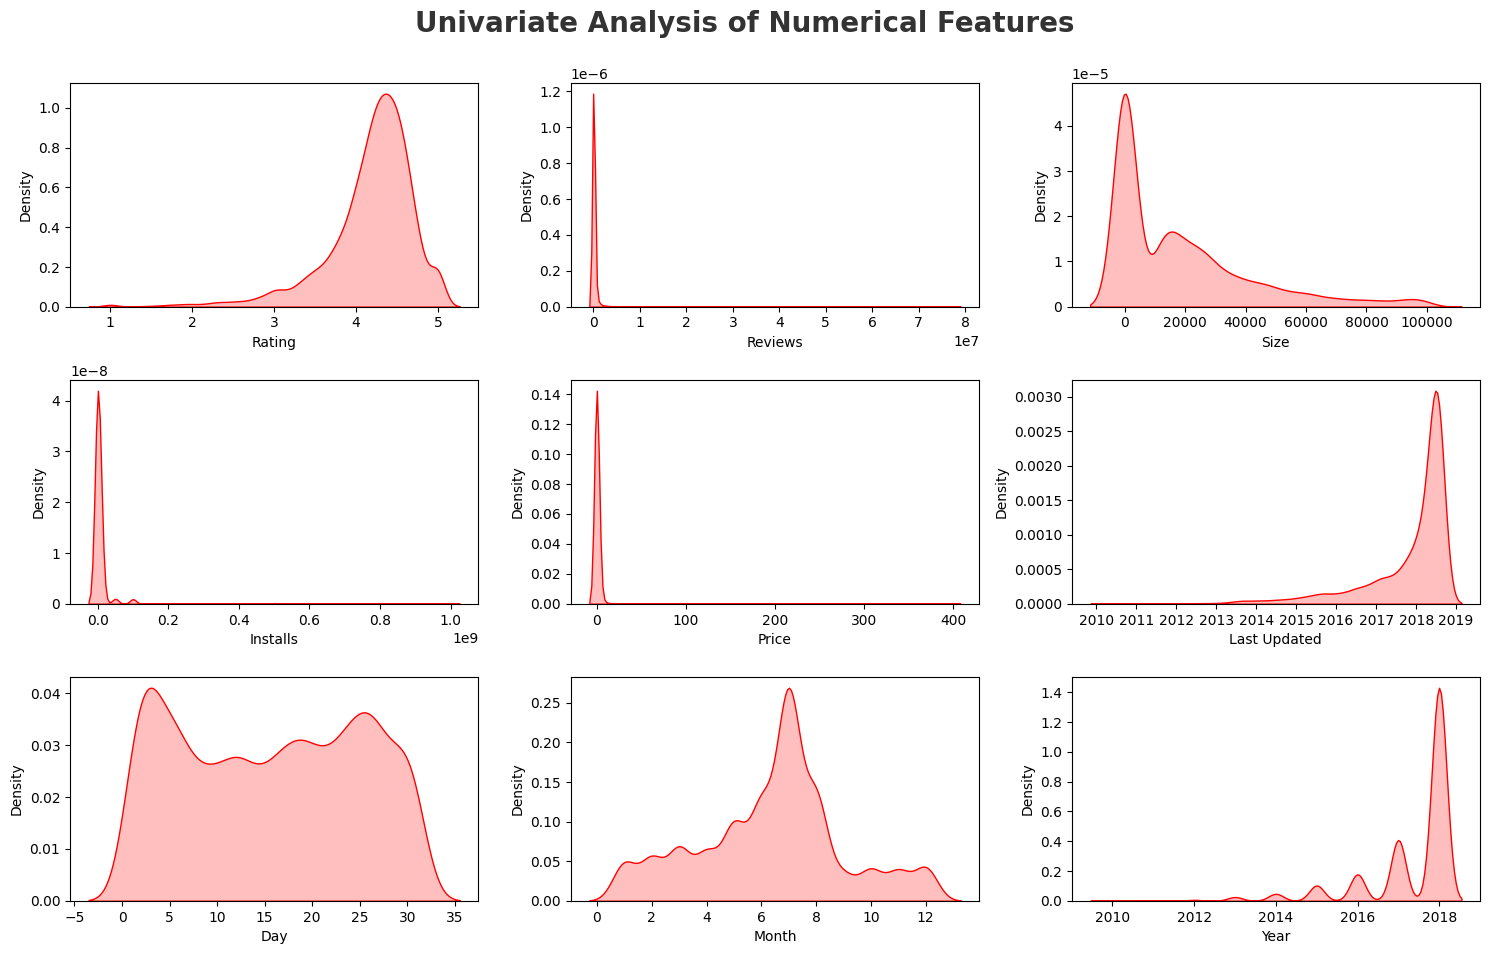

In [41]:
# The provided code performs univariate analysis of numerical features in the DataFrame 
# df_copy by plotting Kernel Density Estimation (KDE) plots for each numerical column.
# Kernel Density Estimation (KDE) in Python is primarily used for estimating the probability density 
# function (PDF) of a random variable. 

## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
# Creates a new figure for the plots with a size of 15x15 inches.
# This ensures that all subplots fit well within the figure.
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
# Adds a title to the entire figure.
# fontsize=20: Sets the font size of the title.
# fontweight='bold': Makes the title bold.
# alpha=0.8: Sets the transparency of the title.
# y=1.: Adjusts the vertical position of the title.
# Loops through all numerical features in the numeric_features list.
# numeric_features is assumed to be a list of column names containing numerical data.
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
#     Creates a grid of subplots with 5 rows and 3 columns.
# i+1 specifies the position of the current subplot in the grid.
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
#     Plots a KDE plot for the current numerical feature.
# [x=df_copy[numeric_features[i]]](http://vscodecontentref/8): Specifies the data for the KDE plot (the current numerical column).
# shade=True: Fills the area under the KDE curve with color.
# color='r': Sets the color of the KDE plot to red.
    plt.xlabel(numeric_features[i])
    # Sets the label of the x-axis to the name of the current numerical feature.
    plt.tight_layout()
    # Adjusts the spacing between subplots to prevent overlapping of plots or labels.

# Purpose:
# This code is used for univariate analysis of numerical features to:

# Visualize the distribution of each numerical column in the dataset.
# Identify patterns, skewness, or outliers in the data.

## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

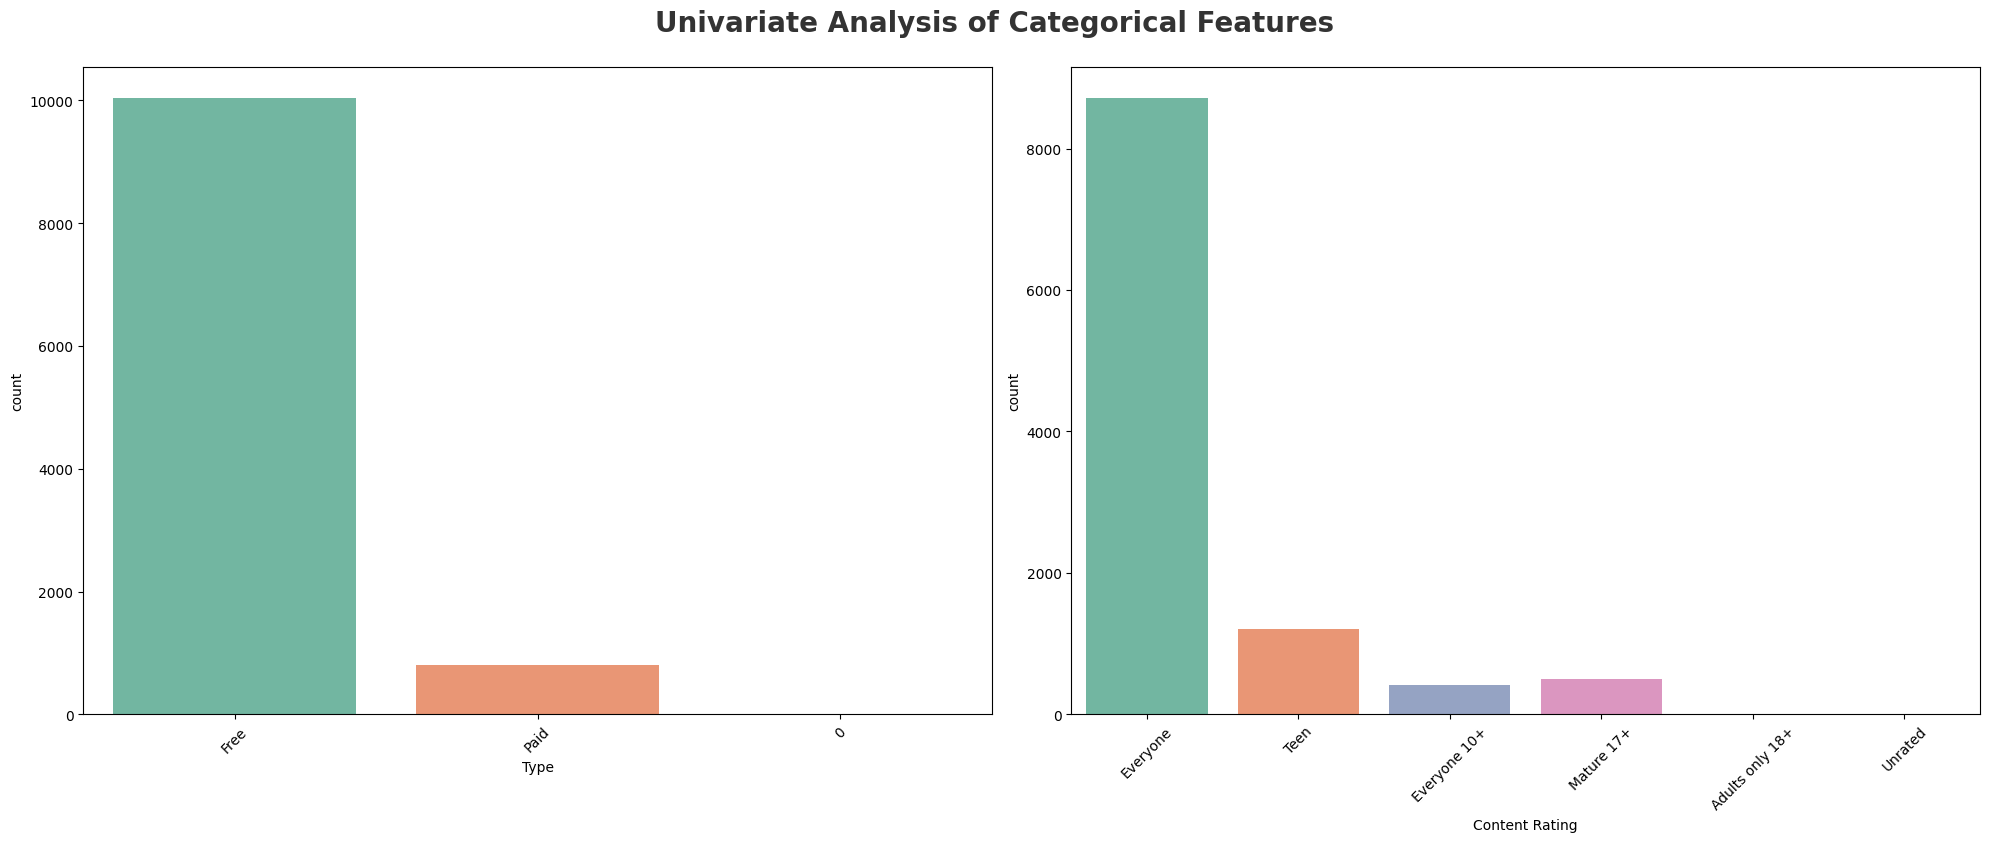

In [42]:
# Setting the figure size for the entire plot
plt.figure(figsize=(20, 15))

# Adding a title to the entire figure
# 'fontsize=20' sets the font size, 'fontweight='bold'' makes the title bold, 'alpha=0.8' sets transparency, and 'y=1.' adjusts the vertical position
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Defining the list of categorical columns to analyze
category = ['Type', 'Content Rating']

# Looping through each categorical column in the 'category' list
for i in range(0, len(category)):
    # Creating subplots in a 2x2 grid (2 rows, 2 columns)
    # 'i+1' specifies the position of the current subplot
    plt.subplot(2, 2, i+1)
    
    # Creating a count plot for the current categorical column
    # 'x=df[category[i]]' specifies the data for the x-axis (the current column)
    # 'palette="Set2"' sets the color palette for the bars
    sns.countplot(x=df[category[i]], palette="Set2")
    
    # Setting the label for the x-axis to the name of the current column
    plt.xlabel(category[i])
    
    # Rotating the x-axis labels by 45 degrees for better readability
    plt.xticks(rotation=45)
    
    # Adjusting the layout to prevent overlapping of subplots and labels
    plt.tight_layout()

## Which is the most popular app category?

In [43]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


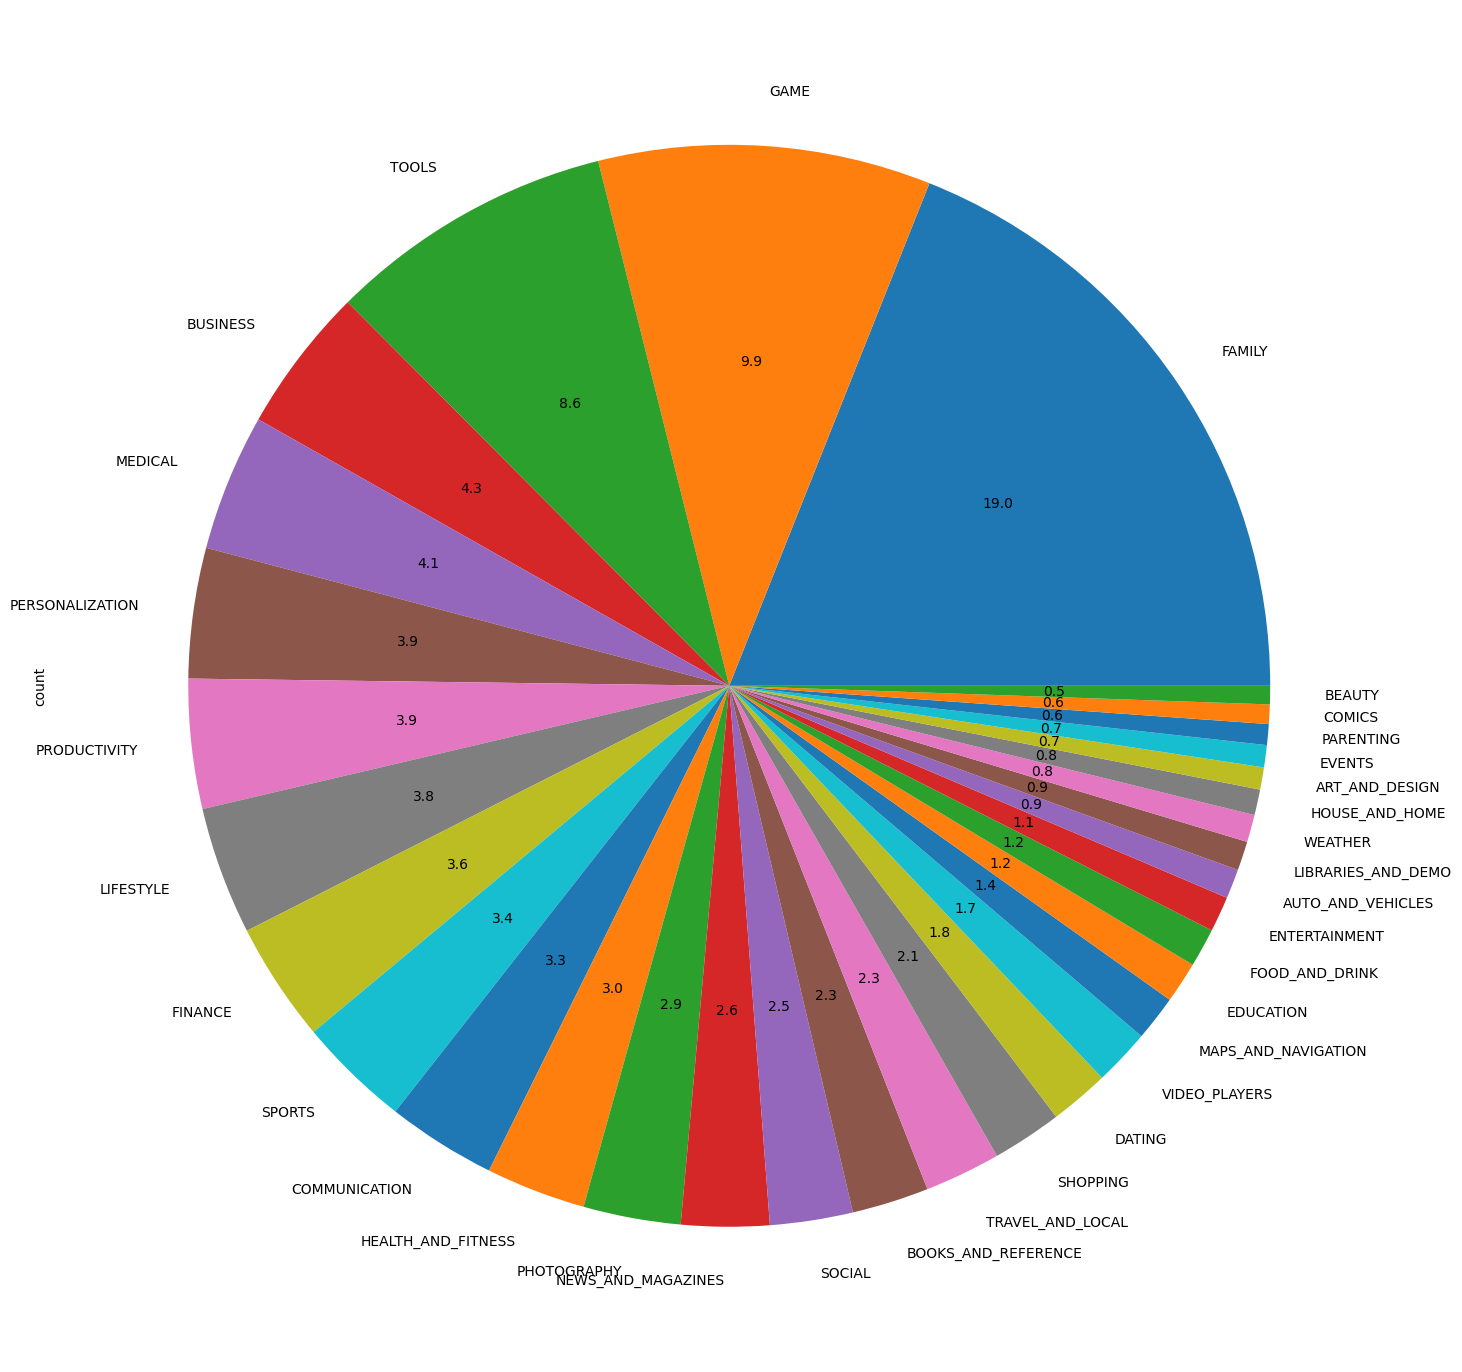

In [45]:
# Counting the occurrences of each unique value in the 'Category' column
# 'value_counts()' returns a Series with the counts of each unique value in descending order
df_copy['Category'].value_counts()

# Creating a pie chart to visualize the distribution of the 'Category' column
# '.plot.pie()' generates a pie chart from the value counts
# 'y=df_copy['Category']' specifies the data to be plotted (though this parameter is unnecessary here and can be omitted)
# 'figsize=(15, 16)' sets the size of the figure to 15 inches wide and 16 inches tall
# 'autopct='%1.1f'' displays the percentage of each slice on the pie chart with one decimal place
df_copy['Category'].value_counts().plot.pie(figsize=(15, 16), autopct='%1.1f')
plt.tight_layout()

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [46]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [47]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


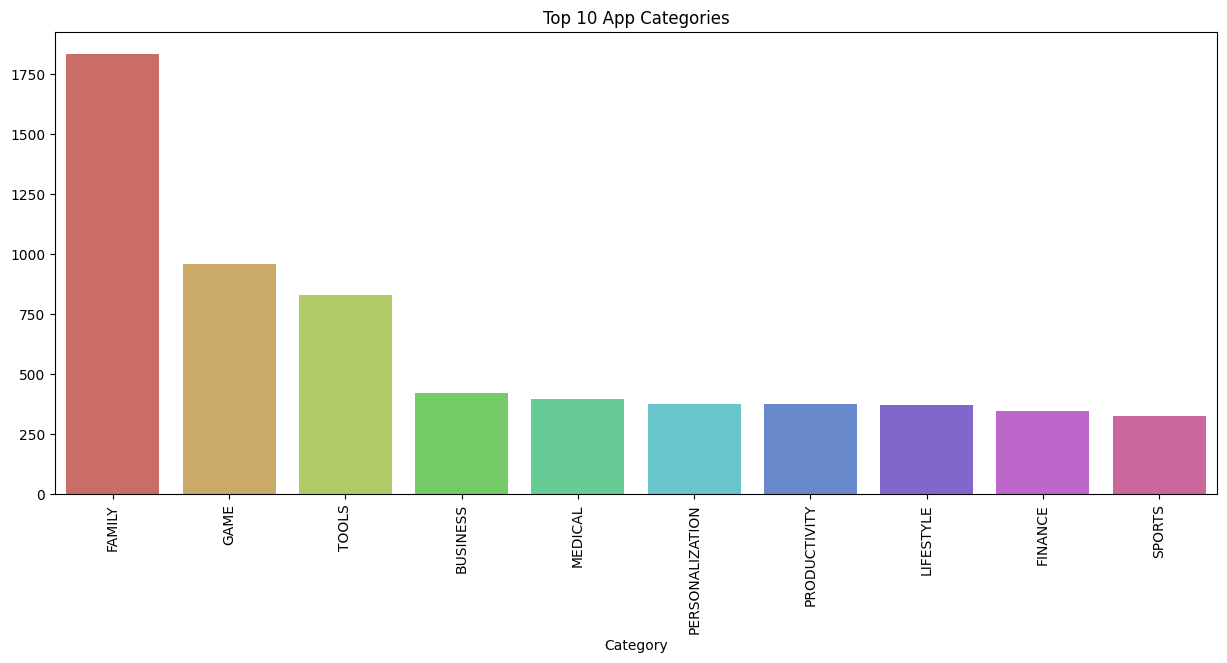

In [49]:
# Get the top 10 categories and their counts
category = df_copy['Category'].value_counts().head(10)

# Plot the top 10 app categories
plt.figure(figsize=(15, 6))
sns.barplot(x=category.index, y=category.values, palette='hls')  # Use index for x and values for y
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

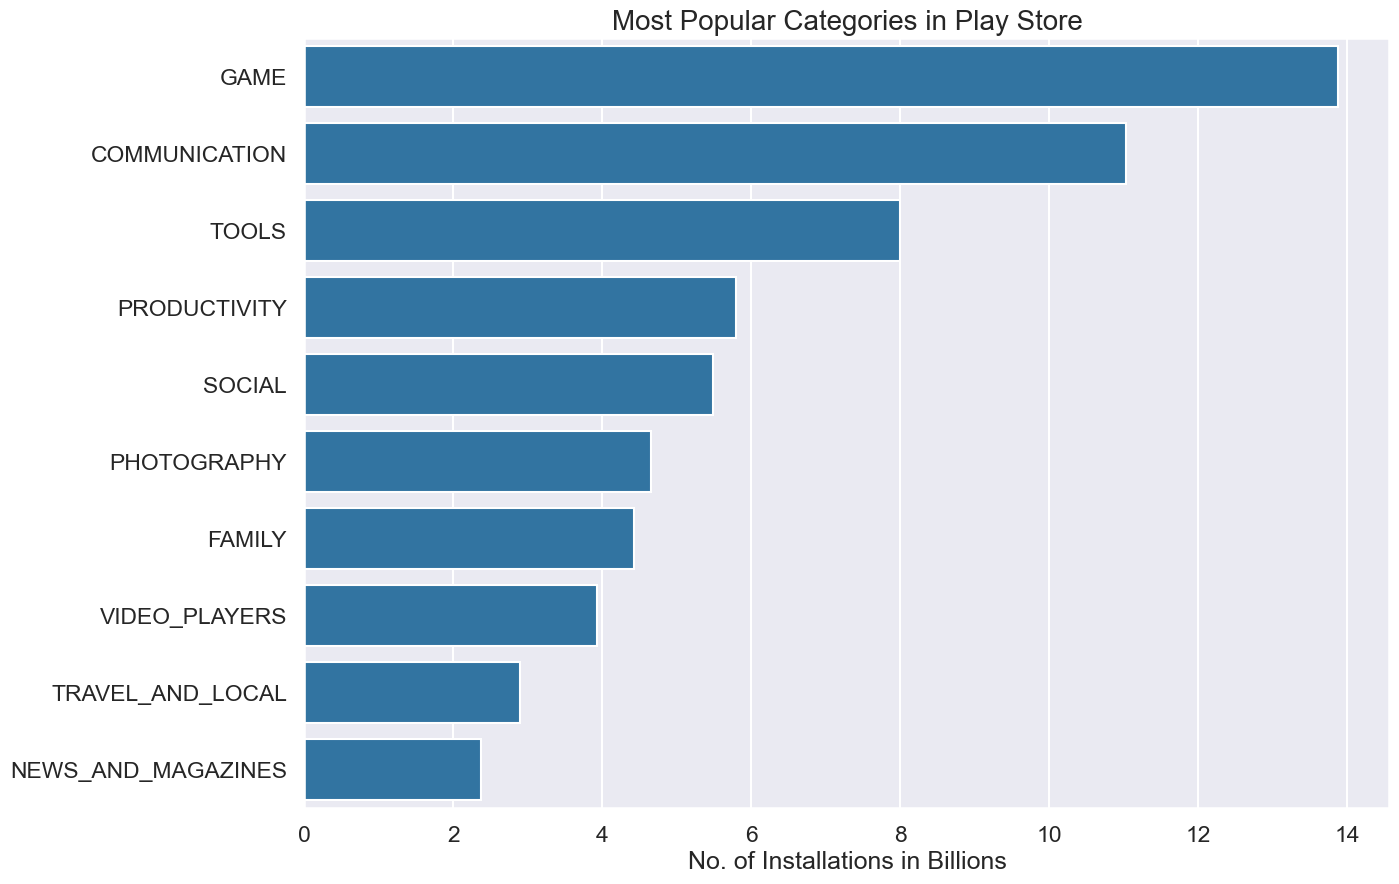

In [50]:
# Grouping the data by 'Category' and summing the 'Installs' column
# Sorting the categories by the total number of installations in descending order
# Resetting the index to convert the result into a DataFrame
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()

# Converting the number of installations into billions for better readability
df_cat_installs.Installs = df_cat_installs.Installs / 1000000000

# Selecting the top 10 categories with the highest number of installations
df2 = df_cat_installs.head(10)

# Setting the figure size for the plot
plt.figure(figsize=(14, 10))

# Setting the context for the plot (e.g., font size and style) to "talk" for better readability
sns.set_context("talk")

# Setting the style of the plot to "darkgrid" for a visually appealing background
sns.set_style("darkgrid")

# Creating a horizontal bar plot to visualize the top 10 categories by installations
# 'x' specifies the number of installations, 'y' specifies the category names, and 'data' is the DataFrame to use
ax = sns.barplot(x='Installs', y='Category', data=df2)

# Setting the label for the x-axis
ax.set_xlabel('No. of Installations in Billions')

# Removing the label for the y-axis (optional for cleaner visualization)
ax.set_ylabel('')

# Adding a title to the plot with a font size of 20
ax.set_title("Most Popular Categories in Play Store", size=20)

In [51]:
# Group by 'Category' and sum the 'Installs' column
category_installs = df_copy.groupby('Category')['Installs'].sum()

# Find the category with the largest number of installations
largest_category = category_installs.idxmax()
largest_installs = category_installs.max()

print(f"The category with the largest number of installations is '{largest_category}' with {largest_installs} installs.")

The category with the largest number of installations is 'GAME' with 13878924415 installs.


## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 5 most installed Apps in Each popular Categories ??

## NEED TO WATCH THE VIDEO FOR THIS PART!!!

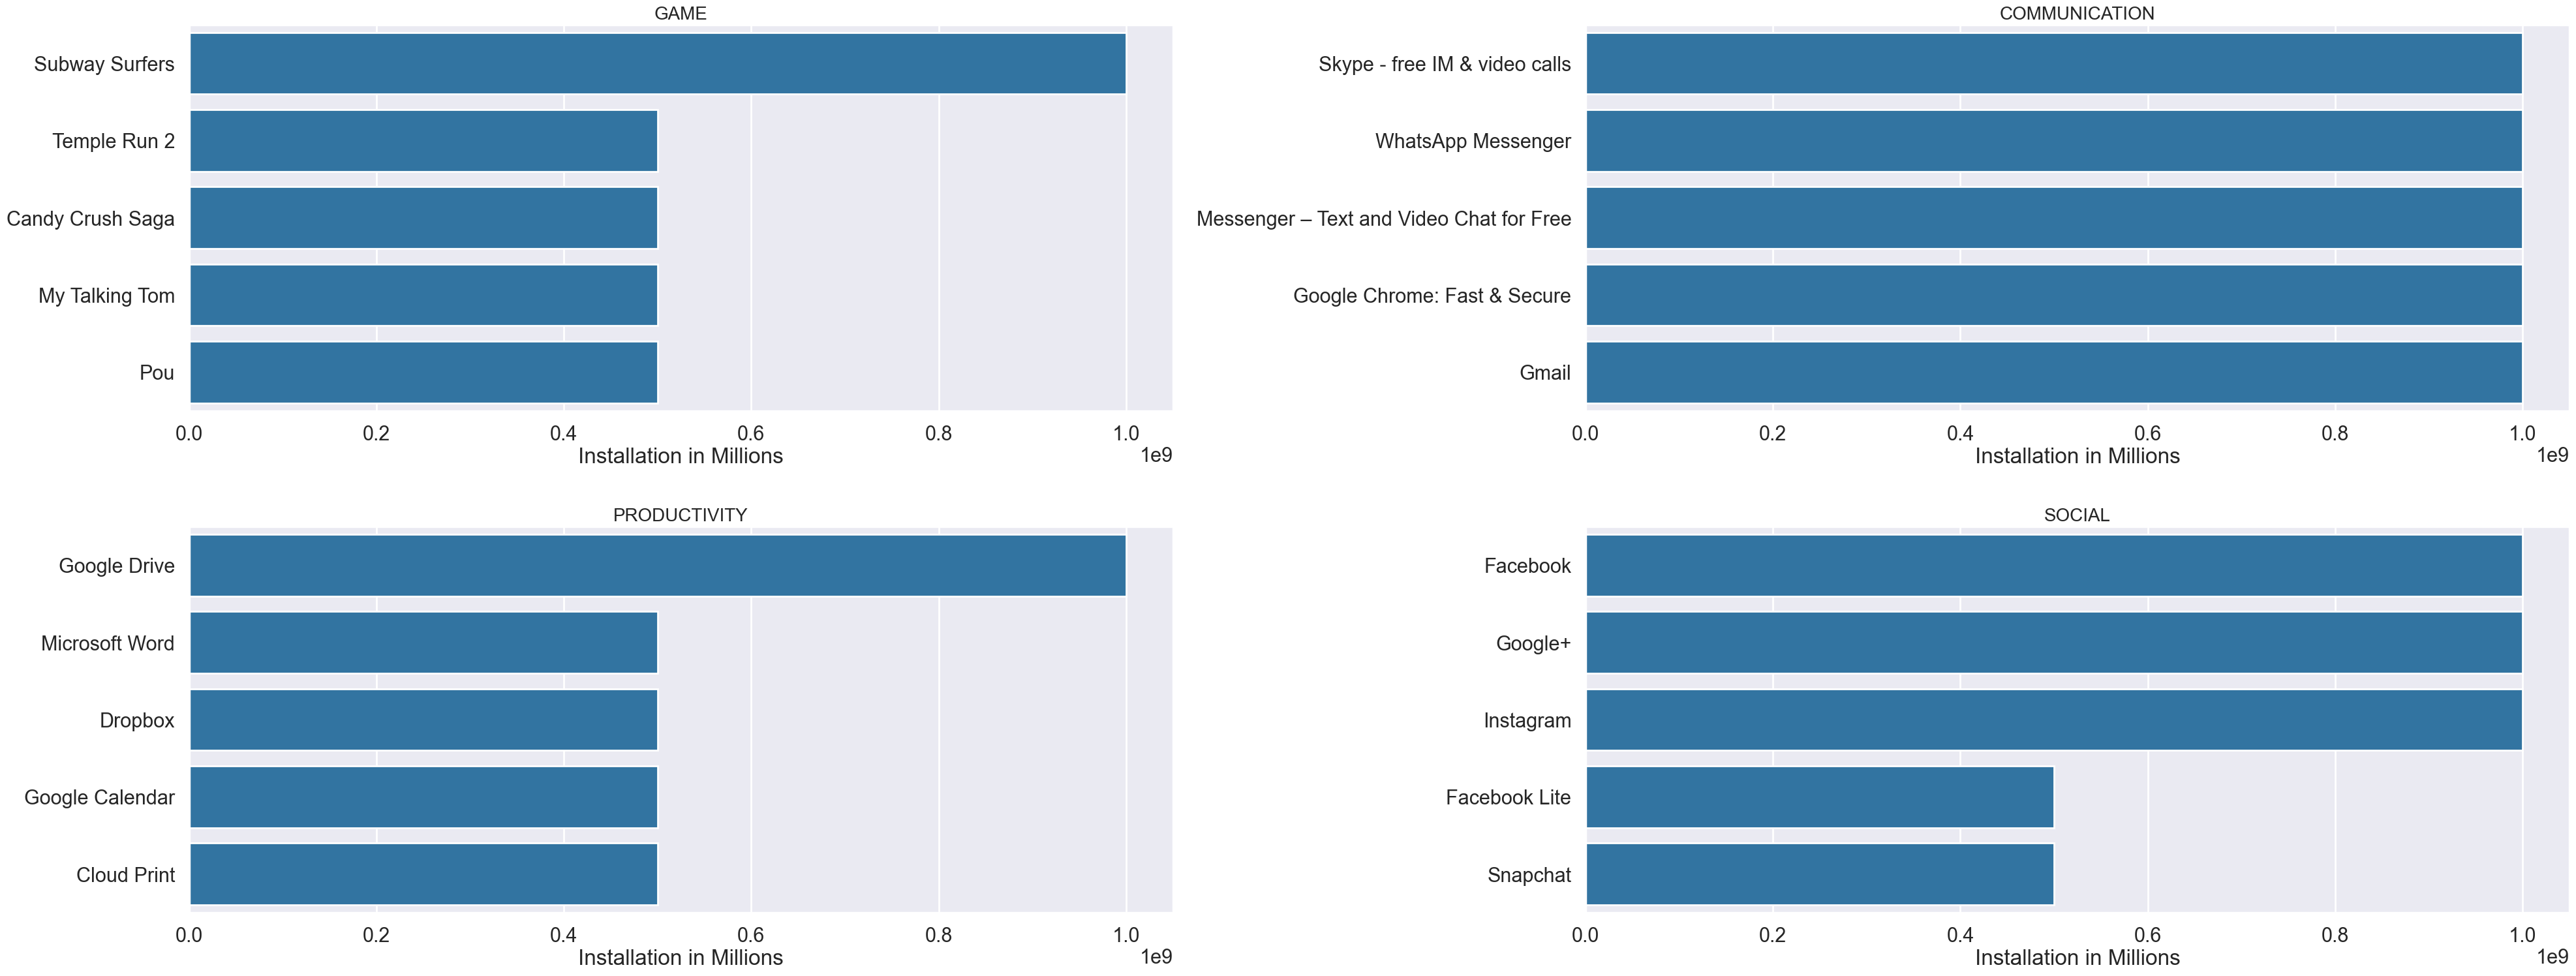

In [52]:
# Grouping the data by 'Category' and 'App' and summing the 'Installs' column
# Resetting the index to convert the result into a DataFrame
dfa = df_copy.groupby(['Category', 'App'])['Installs'].sum().reset_index()

# Sorting the DataFrame by the 'Installs' column in descending order
dfa = dfa.sort_values('Installs', ascending=False)

# Defining a list of popular categories to analyze
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL']

# Setting the context for the plot (e.g., font size and style) to "poster" for large, clear visuals
sns.set_context("poster")

# Setting the style of the plot to "darkgrid" for a visually appealing background
sns.set_style("darkgrid")

# Setting the figure size for the entire plot
plt.figure(figsize=(40, 30))

# Looping through each category in the 'apps' list
for i, app in enumerate(apps):
    # Filtering the DataFrame for the current category
    df2 = dfa[dfa.Category == app]
    
    # Selecting the top 5 apps with the highest installations in the current category
    df3 = df2.head(5)
    
    # Creating subplots in a 4x2 grid (4 rows, 2 columns)
    # 'i+1' specifies the position of the current subplot
    plt.subplot(4, 2, i+1)
    
    # Creating a horizontal bar plot for the top 5 apps in the current category
    # 'x' specifies the number of installations, 'y' specifies the app names, and 'data' is the filtered DataFrame
    sns.barplot(data=df3, x='Installs', y='App')
    
    # Setting the label for the x-axis
    plt.xlabel('Installation in Millions')
    
    # Removing the label for the y-axis (optional for cleaner visualization)
    plt.ylabel('')
    
    # Adding a title to the subplot with the name of the current category
    plt.title(app, size=20)

# Adjusting the layout to prevent overlapping of subplots and labels
plt.tight_layout()

# Adding space between subplots for better readability
plt.subplots_adjust(hspace=0.3)

# Displaying the final plot
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings??

In [53]:
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,10,DN Employee,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category

In [54]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
